# Tables

In [1]:
cd ..

/cellar/users/agross/TCGA_Code/DX/Notebooks


In [2]:
import NotebookImport
from DX_screen import *

importing IPython notebook from DX_screen

importing IPython notebook from Imports

importing IPython notebook from /cellar/users/agross/anaconda2/lib/python2.7/site-packages/MethylTools/Probe_Annotations

In [3]:
FIG_DIR = '/cellar/users/agross/Desktop/Figures/'

In [4]:
dx_rna.sort('p').to_csv(FIG_DIR + 'f_up_genes.csv')
dx_mir.sort('p').to_csv(FIG_DIR + 'f_up_miR.csv')
dx_meth.sort('p').to_csv(FIG_DIR + 'f_up_meth.csv')

In [5]:
from metaPCNA import *

importing IPython notebook from metaPCNA

In [6]:
dp = -1*meta_pcna_all.unstack()[['01','11']].dropna().T.diff().ix['11']
dp = dp[dp > 0]
dp.name = 'proliferation change'

In [7]:
dx =  matched_tn
dx = dx.xs('01',1,1) - dx.xs('11',1,1)
pcna_corr_genes = dx.T.corrwith(dp)

In [8]:
pearson_pandas(pcna_corr_genes, dx_rna.frac)

rho    0.62
p      0.00
dtype: float64

In [9]:
dx =  matched_mir
dx = dx.xs('01',1,1) - dx.xs('11',1,1)
pts = dx.columns.intersection(dp.index)
dx = dx.ix[:, pts]
pcna_corr_mir = dx.T.corrwith(dp.ix[pts])
len(pts)

523

In [10]:
dx_mir_match = binomial_test_screen(matched_mir.ix[:, pts], 1.)
dx_mir_match = dx_mir_match[dx_mir_match.num_dx > 300]

In [11]:
pearson_pandas(pcna_corr_mir, dx_mir_match.frac)

rho    5.78e-01
p      1.87e-44
dtype: float64

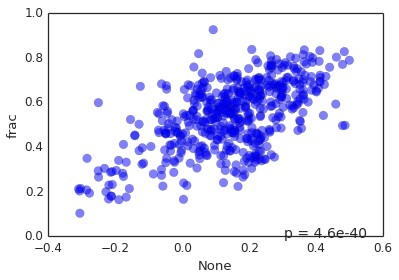

In [12]:
series_scatter(pcna_corr_mir, dx_mir.frac)

In [13]:
%%time
dx =  matched_meth
dx = dx.xs('01',1,1) - dx.xs('11',1,1)
pts = dx.columns.intersection(dp.index)
dx = dx.ix[:, pts]
pcna_corr_meth = dx.T.corrwith(dp.ix[pts])
len(pts)

CPU times: user 1min, sys: 1.26 s, total: 1min 1s
Wall time: 59.2 s


In [14]:
dx_meth_match = binomial_test_screen(matched_meth.ix[:, pts], 1.)
dx_meth_match = dx_meth_match[dx_meth_match.num_dx > 300]

In [15]:
pearson_pandas(pcna_corr_meth, dx_meth_match.frac)

rho    0.62
p      0.00
dtype: float64

In [16]:
m = pd.rolling_mean(dx_rna.frac.ix[pcna_corr_genes.order().index].dropna(), 
                    window=50, center=True).dropna()
f_win_genes = (dx_rna.frac - m).dropna()
f_win_genes.name = 'fraction overexpressed (detrended)'

In [17]:
m = pd.rolling_mean(dx_mir_match.frac.ix[pcna_corr_mir.order().index].dropna(), 
                    window=50, center=True).dropna()
f_win_mir = (dx_mir_match.frac - m).dropna()
f_win_mir.name = 'fraction overexpressed (detrended)'

In [18]:
m = pd.rolling_mean(dx_meth_match.frac.ix[pcna_corr_meth.order().index].dropna(), 
                    window=50, center=True).dropna()
f_win_meth = (dx_meth_match.frac - m).dropna()
f_win_meth.name = 'fraction overexpressed (detrended)'

In [19]:
df = pd.concat({'fraction upregulated': dx_rna.frac,
                'proliferation score': pcna_corr_genes,
                'detrended f_up': f_win_genes}, 1)[[1,2,0]]
df = df.ix[dx_rna.index].sort('detrended f_up', ascending=False)
df.to_csv(FIG_DIR + 'proliferation_score_genes.csv')

In [20]:
df = pd.concat({'fraction upregulated': dx_mir.frac,
                'fraction upregulated (matched patients)': dx_mir_match.frac,
                'proliferation score': pcna_corr_mir,
                'detrended f_up': f_win_mir}, 1)[[1,2,3, 0]]
df = df.ix[dx_mir.index].sort('detrended f_up', ascending=False)
df.to_csv(FIG_DIR + 'proliferation_score_mir.csv')

In [21]:
df = pd.concat({'fraction upregulated': dx_meth.frac,
                'fraction upregulated (matched patients)': dx_meth_match.frac,
                'proliferation score': pcna_corr_meth,
                'detrended f_up': f_win_meth}, 1)[[1,2,3, 0]]
df = df.ix[dx_meth.index].sort('detrended f_up', ascending=False)
df.to_csv(FIG_DIR + 'proliferation_score_meth.csv')